In [1]:
using Gen

[ Info: Precompiling Gen [ea4f424c-a589-11e8-07c0-fd5c91b9da4a]


In [29]:
import Pkg; Pkg.add("Distributions")
using Distributions
using Plots
using Random

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


Gamma{Float64}(α=4.0, θ=0.09)


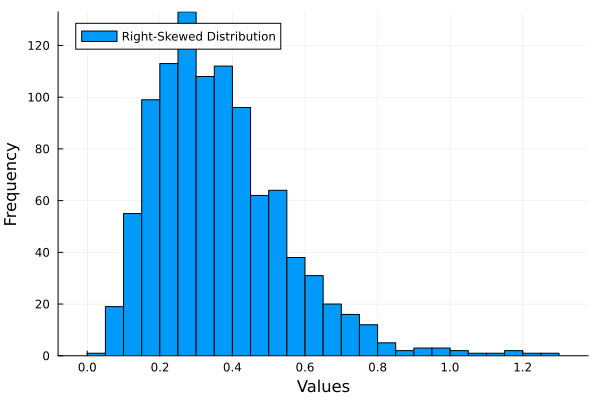

In [42]:
# Set a seed for reproducibility
Random.seed!(123)

# Generate random numbers from a gamma distribution
shape_parameter = 4.0  # Shape parameter (adjust as needed)
scale_parameter = 0.09  # Scale parameter (adjust as needed)
num_samples = 1000    # Number of samples

# Create a gamma distribution
gamma_dist = Gamma(shape_parameter, scale_parameter)

# Generate random numbers
data = rand(gamma_dist, num_samples)

# Plot the histogram
histogram(data, bins=30, label="Right-Skewed Distribution", xlabel="Values", ylabel="Frequency", legend=:topleft)

In [44]:
# Decide how much to bet/call proportional to the pot (and somewhat proportional to their bankroll)

"""
Variables to decide how to bet
- Bankroll 
- Potsize (All in will be measured differently (anything above x10 or sth))
- Bullishness (own range)
- Bluff prob

How the variables will interact

"""

"""
DATA INFO
Avg bankroll is  80154.73618429388
Highest bankroll is  1107305561
Lowest bankroll is  1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5280000, 5295000, 5316672, 5440000, 5555000, 5640000, 5780000, 5782500, 6055000, 6206500, 6227500, 6307500, 6455000, 6715000, 6823000, 6862500, 6945000, 6974500, 7360000, 7560000, 7622500, 7635000, 7715000, 7720000, 8035000, 8035000, 8035000, 8450000, 9120000, 9327500, 9375000, 9383000, 9455000, 9511000, 9615000, 9639000, 10055000, 10602500, 10680000, 10692500, 11550000, 11600000, 11960000, 12480000, 12630000, 12740000, 47051336, 48525668, 65496492, 65496692, 65497502, 65498162, 65499122, 65545102, 65545392, 65552652, 65552682, 65555082, 65562102, 65564542, 65566972, 65569369, 65571039, 65571309, 65572119, 729325169, 729412914, 729455400, 729462982, 729463012, 729464092, 729479262, 729480288, 729487402, 729491472, 729541228, 729566146, 1107260864, 1107262139, 1107262264, 1107262389, 1107262889, 1107263764, 1107267210, 1107267300, 1107269730, 1107285305, 1107295616, 1107297276, 1107297536, 1107297726, 1107298006, 1107298006, 1107298006, 1107298246, 1107298276, 1107298346, 1107304756, 1107304846, 1107305561]
"""

@gen function poker_betting_model()
    # Define parameters
    initial_pot = 100 
    bankroll ~ 
    opponent_range = 0.3
    while opponent_range > 1.0
        opponent_range ~ rand(gamma_dist, 1)
    end
    # How much they bet when they are bluffing
    bluff_strategy ~
    current_pot ~ normal(initial_pot, 10)
    
    # Decision variables
    # bet_amount ~ normal(1, current_pot)
    
    # Decision process
    is_bluffing ~ bernoulli(0.5)
    true_hand_strength ~ normal(0, 1)
    
    # Betting strategy
    if is_bluffing
        # Bluffing strategy
        bet_fraction = 
    else
        # Honest strategy
        bet_fraction = true_hand_strength
    end
    
    # Calculate the bet amount based on the strategy
    bet_amount = current_pot * bet_fraction
    bet_amount ~ round(bet_amount)
    
    # Update the current pot after the bet
    new_pot = current_pot - bet_amount
    
    # Likelihood of the observed bet amount
    @trace(normal(new_pot, 5), :observed_bet_amount)
end

LoadError: syntax: unexpected "else"

In [24]:
# Generate a trace from the model
trace = Gen.simulate(poker_betting_model, ())

LoadError: MethodError: no method matching traceat(::Gen.GFSimulateState, ::typeof(round), ::Tuple{Float64}, ::Symbol)

[0mClosest candidates are:
[0m  traceat(::Gen.GFSimulateState, [91m::Distribution{T}[39m, ::Any, ::Any) where T
[0m[90m   @[39m [36mGen[39m [90m~/.julia/packages/Gen/ME5el/src/dynamic/[39m[90m[4msimulate.jl:12[24m[39m
[0m  traceat(::Gen.GFSimulateState, [91m::GenerativeFunction{T, U}[39m, ::Any, ::Any) where {T, U}
[0m[90m   @[39m [36mGen[39m [90m~/.julia/packages/Gen/ME5el/src/dynamic/[39m[90m[4msimulate.jl:30[24m[39m
[0m  traceat([91m::Gen.GFRegenerateState[39m, [91m::Distribution{T}[39m, ::Any, ::Any) where T
[0m[90m   @[39m [36mGen[39m [90m~/.julia/packages/Gen/ME5el/src/dynamic/[39m[90m[4mregenerate.jl:17[24m[39m
[0m  ...


In [ ]:
# Accessing the results
current_pot_value = Gen.get_choices(trace)[:current_pot]
bet_amount_value = Gen.get_choices(trace)[:bet_amount]
observed_bet_amount_value = Gen.get_choices(trace)[:observed_bet_amount]

println("Current Pot: ", current_pot_value)
println("Bet Amount: ", bet_amount_value)
println("Observed Bet Amount: ", observed_bet_amount_value)